In [3]:
pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 26.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 3/5 [cmdstanpy]  WARNING: The scripts install_cmdstan and install_cxx_toolchain are installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [prophet]m4/5 [prophet]
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df = pd.read_csv('/workspaces/Advanced-Data-Analyst-Projects/supply_chain_disruption_prediction/data/shipments_cleaned.csv')
df['ShipmentDate'] = pd.to_datetime(df['shipmentdate'])

In [6]:
weekly_shipments = df.groupby(pd.Grouper(key='ShipmentDate', freq='W')).size().reset_index(name='shipments')

In [7]:
forecast_df = weekly_shipments.rename(columns={'ShipmentDate': 'ds', 'shipments': 'y'})

In [11]:
# Create and fit the Prophet model
model = Prophet()
model.fit(forecast_df)

future = model.make_future_dataframe(periods=12, freq='W')  # forecast next 12 weeks
forecast = model.predict(future)

16:22:27 - cmdstanpy - INFO - Chain [1] start processing
16:22:27 - cmdstanpy - INFO - Chain [1] done processing


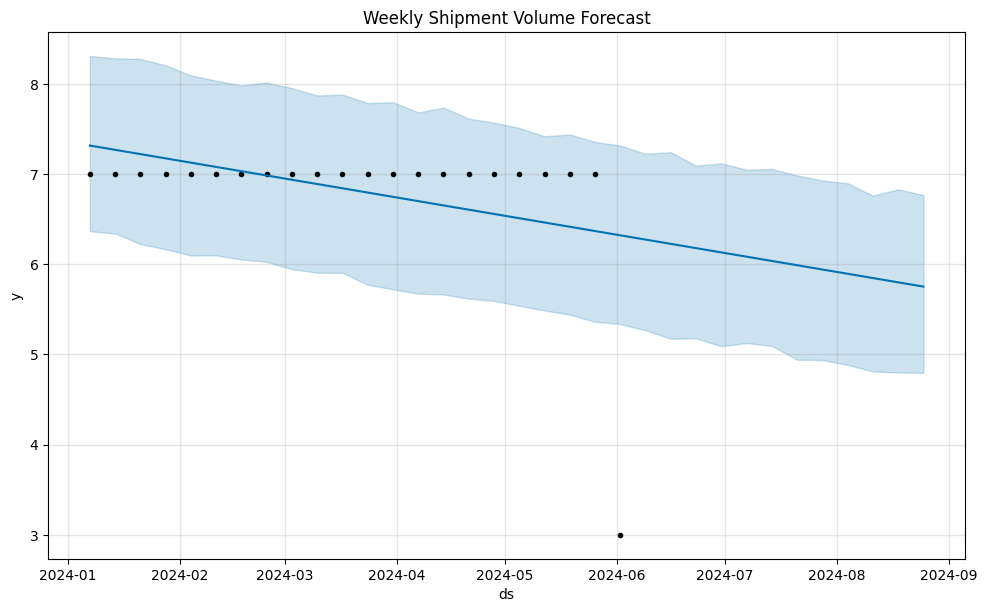

In [12]:
fig = model.plot(forecast)
plt.title("Weekly Shipment Volume Forecast")
plt.show()

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('/workspaces/Advanced-Data-Analyst-Projects/supply_chain_disruption_prediction/data/shipment_forecast.csv', index=False)